EXPLORATORY DATA ANALYSIS - SPORTS

Exploratory Data Analysis (EDA) :

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the datasets
matches = pd.read_csv('/content/matches.csv')
deliveries = pd.read_csv('/content/deliveries.csv')

In [8]:
# Display basic information about the datasets
print(matches.info())
print(deliveries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
# Display the first few rows of the datasets
print(matches.head())
print(deliveries.head())

   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad     

Success Analysis :

Identify the Most Successful Teams

                             Wins  Matches Played  Win Percentage
Delhi Capitals                 10              16       62.500000
Rising Pune Supergiant         10              16       62.500000
Chennai Super Kings           100             164       60.975610
Mumbai Indians                109             187       58.288770
Sunrisers Hyderabad            58             108       53.703704
Kolkata Knight Riders          92             178       51.685393
Rajasthan Royals               75             147       51.020408
Royal Challengers Bangalore    84             180       46.666667
Kings XI Punjab                82             176       46.590909
Gujarat Lions                  13              30       43.333333
Kochi Tuskers Kerala            6              14       42.857143
Delhi Daredevils               67             161       41.614907
Deccan Chargers                29              75       38.666667
Rising Pune Supergiants         5              14       35.714286
Pune Warri

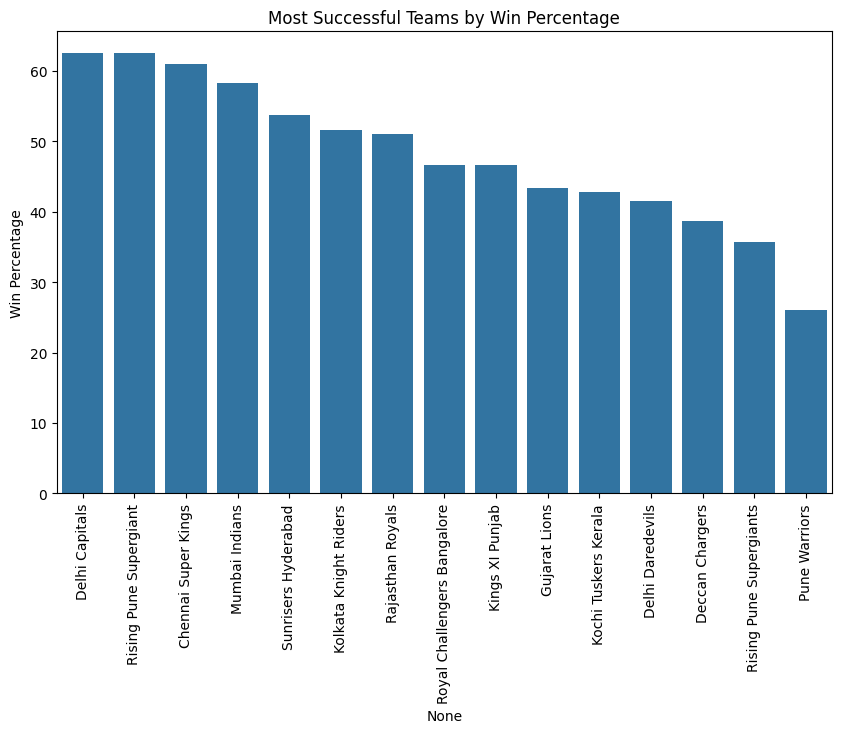

In [11]:
# Calculate total wins for each team
team_wins = matches['winner'].value_counts()

# Calculate the win percentage for each team
matches_played = matches['team1'].value_counts() + matches['team2'].value_counts()
win_percentage = (team_wins / matches_played) * 100

# Display the most successful teams
successful_teams = pd.DataFrame({'Wins': team_wins, 'Matches Played': matches_played, 'Win Percentage': win_percentage})
successful_teams = successful_teams.sort_values(by='Win Percentage', ascending=False)
print(successful_teams)

# Visualize the most successful teams
plt.figure(figsize=(10, 6))
sns.barplot(x=successful_teams.index, y=successful_teams['Win Percentage'])
plt.title('Most Successful Teams by Win Percentage')
plt.xticks(rotation=90)
plt.show()


Identify Top-Performing Players

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64
bowler
SL Malinga         170
A Mishra           156
Harbhajan Singh    150
PP Chawla          149
DJ Bravo           147
B Kumar            133
R Ashwin           125
SP Narine          122
UT Yadav           119
RA Jadeja          108
Name: dismissal_kind, dtype: int64


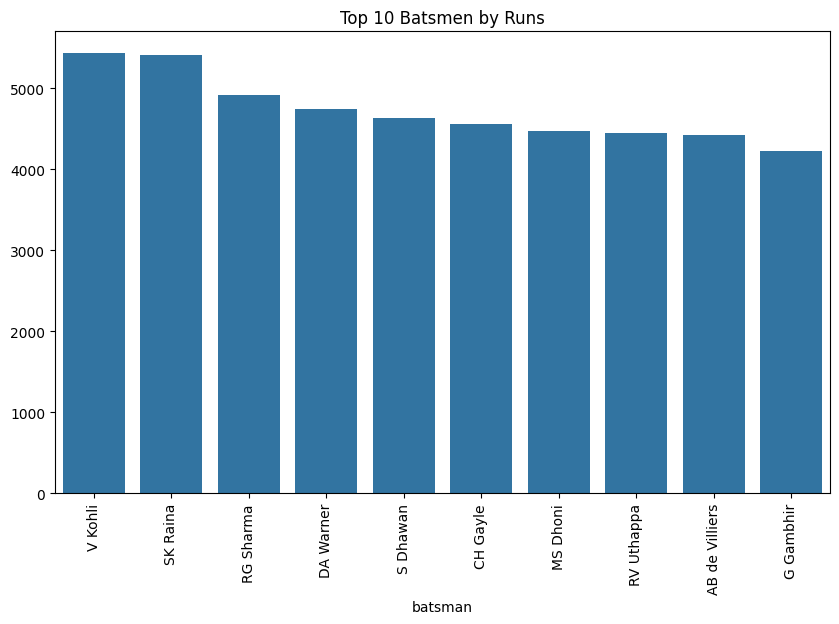

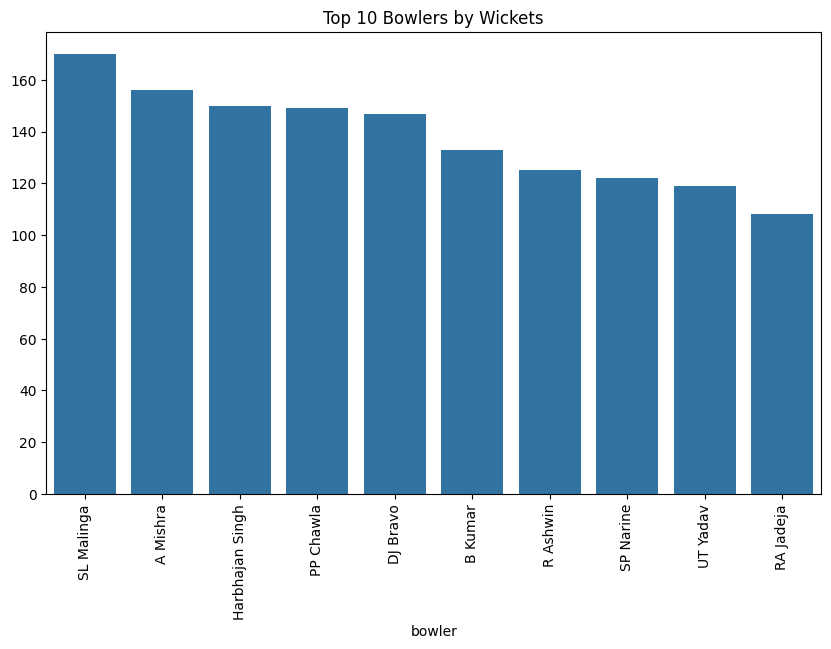

In [12]:
# Top Batsmen based on Runs
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
print(top_batsmen)

# Top Bowlers based on Wickets
top_bowlers = deliveries[deliveries['dismissal_kind'].notnull() & (deliveries['dismissal_kind'] != 'run out')]
top_bowlers = top_bowlers.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10)
print(top_bowlers)

# Visualize top batsmen
plt.figure(figsize=(10, 6))
sns.barplot(x=top_batsmen.index, y=top_batsmen.values)
plt.title('Top 10 Batsmen by Runs')
plt.xticks(rotation=90)
plt.show()

# Visualize top bowlers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_bowlers.index, y=top_bowlers.values)
plt.title('Top 10 Bowlers by Wickets')
plt.xticks(rotation=90)
plt.show()


Factors Contributing to Team Wins or Losses

toss_decision
field    65.903308
bat      34.096692
Name: proportion, dtype: float64


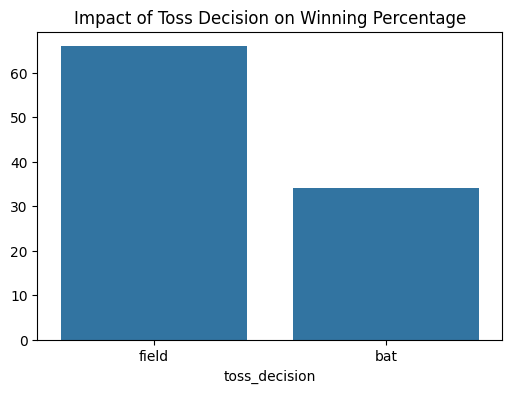

city
Abu Dhabi         42.857143
Ahmedabad         58.333333
Bangalore         46.875000
Bengaluru         53.846154
Bloemfontein      50.000000
Cape Town         28.571429
Centurion         16.666667
Chandigarh        47.826087
Chennai           70.175439
Cuttack           42.857143
Delhi             36.986301
Dharamsala        55.555556
Durban            20.000000
East London       33.333333
Hyderabad         46.875000
Indore            44.444444
Jaipur            68.085106
Johannesburg      37.500000
Kanpur            50.000000
Kimberley         33.333333
Kochi             40.000000
Kolkata           58.441558
Mohali            80.000000
Mumbai            52.475248
Nagpur            66.666667
Port Elizabeth    28.571429
Pune              15.789474
Raipur            66.666667
Rajkot            30.000000
Ranchi            42.857143
Sharjah           33.333333
Visakhapatnam     23.076923
dtype: float64


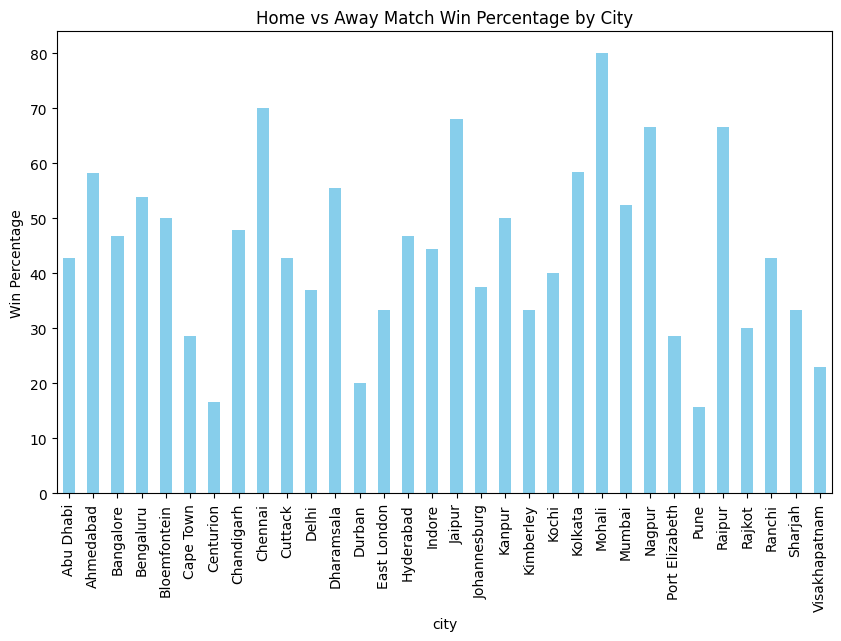

In [13]:
# Analyze the impact of toss decisions on match results
toss_win_match_win = matches[matches['toss_winner'] == matches['winner']]
toss_decision_win_percentage = toss_win_match_win['toss_decision'].value_counts(normalize=True) * 100

print(toss_decision_win_percentage)

# Visualize the impact of toss decisions on match outcomes
plt.figure(figsize=(6, 4))
sns.barplot(x=toss_decision_win_percentage.index, y=toss_decision_win_percentage.values)
plt.title('Impact of Toss Decision on Winning Percentage')
plt.show()

# Analyze home vs away match wins
home_away_win = matches.groupby('city')['winner'].value_counts(normalize=True).unstack().fillna(0)
home_away_win_percentage = home_away_win.max(axis=1) * 100

print(home_away_win_percentage)

# Visualize home vs away match win percentages
plt.figure(figsize=(10, 6))
home_away_win_percentage.plot(kind='bar', color='skyblue')
plt.title('Home vs Away Match Win Percentage by City')
plt.ylabel('Win Percentage')
plt.xticks(rotation=90)
plt.show()


Endorsement Recommendations :

          batsman  batsman_runs  popularity  composite_score
0         V Kohli          5434          57           3820.9
1        SK Raina          5415          92           3818.1
2       RG Sharma          4914          78           3463.2
3       DA Warner          4741          79           3342.4
4        S Dhawan          4632          69           3263.1
5        CH Gayle          4560          83           3216.9
6        MS Dhoni          4477          80           3157.9
7      RV Uthappa          4446          93           3140.1
8  AB de Villiers          4428          93           3127.5
9       G Gambhir          4223          86           2981.9


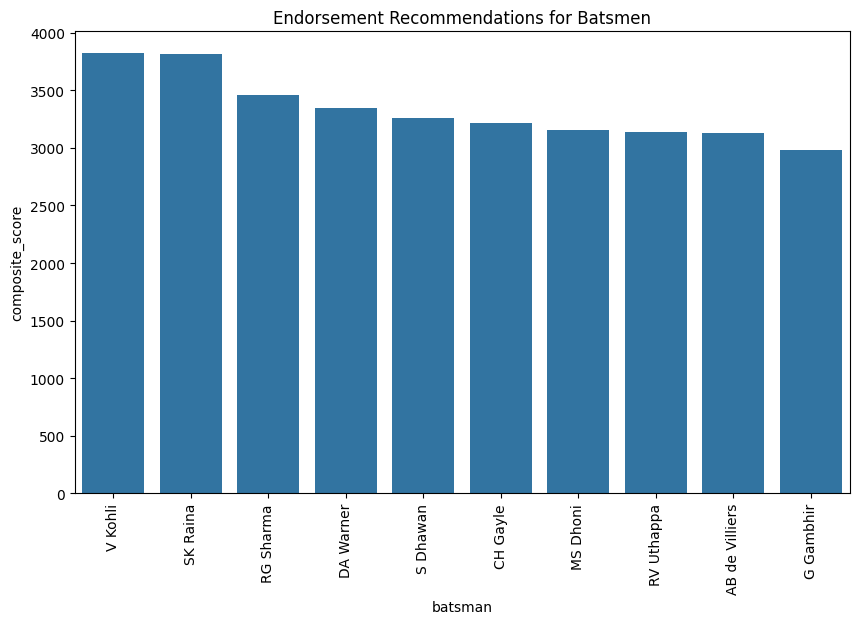

In [16]:
# Assuming popularity data is not available, we'll generate dummy popularity scores
# In real-world scenarios, you could use actual data like social media followers, media mentions, etc.

# Add a dummy popularity column for top batsmen (for demonstration)
top_batsmen_popularity = top_batsmen.reset_index()
top_batsmen_popularity['popularity'] = np.random.randint(50, 100, size=len(top_batsmen_popularity))

# Create a composite score combining performance and popularity
top_batsmen_popularity['composite_score'] = top_batsmen_popularity['batsman_runs'] * 0.7 + top_batsmen_popularity['popularity'] * 0.3

# Recommend players based on the composite score
recommendations = top_batsmen_popularity.sort_values(by='composite_score', ascending=False)
print(recommendations)

# Visualize endorsement recommendations
plt.figure(figsize=(10, 6))
sns.barplot(x=recommendations['batsman'], y=recommendations['composite_score'])
plt.title('Endorsement Recommendations for Batsmen')
plt.xticks(rotation=90)
plt.show()
